[DIY Covid-19 Dashboard Kit](https://github.com/fsmeraldi/diy-covid19dash) (C) Fabrizio Smeraldi, 2020 ([f.smeraldi@qmul.ac.uk](mailto:f.smeraldi@qmul.ac.uk) - [web](http://www.eecs.qmul.ac.uk/~fabri/)). All rights reserved.

# DIY Covid-19 Dashboard

This is a template for your DIY Covid Dashboard, to which you can add the code you developed in the previous notebooks. The dashboard will be displayed using [voila](https://voila.readthedocs.io/en/stable/index.html), a Python dashboarding tool that converts notebooks to standalone dashboards. Contrary to the other libraries we have seen, the ```voila``` package must be installed using *pip* or *conda* but it does not need to be imported - it rather acts at the level of the notebook server. Package ```voila``` is already installed on the EECS JupyterHub as well as in the binder - to install it locally, follow the [instructions](https://voila.readthedocs.io/en/stable/install.html) online.

Broadly speaking, Voila acts by **running all the cells in your notebook** when the dashboard is first loaded; it then hides all code cells and displays all markdown cells and any outputs, including widgets. However, the code is still there in the background and handles any interaction with the widgets. To view this dashboard template rendered in Voila click [here](https://mybinder.org/v2/gh/fsmeraldi/diy-covid19dash/main?urlpath=%2Fvoila%2Frender%2FDashboard.ipynb).

In [76]:
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

In [77]:
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 100

## Load initial data from disk



In [78]:
# Load JSON files and store the raw data in  variable.
with open("timeseries.json", "rt") as INFILE:
    data=json.load(INFILE)

In [79]:
data

{'data': [{'date': '2022-11-24',
   'hospitalCases': 5840,
   'covidOccupiedMVBeds': None},
  {'date': '2022-11-23', 'hospitalCases': 5785, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-22', 'hospitalCases': 5856, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-21', 'hospitalCases': 5903, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-20', 'hospitalCases': 5932, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-19', 'hospitalCases': 5919, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-18', 'hospitalCases': 6007, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-17', 'hospitalCases': 6123, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-16', 'hospitalCases': 6322, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-15', 'hospitalCases': 6490, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-14', 'hospitalCases': 6645, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-13', 'hospitalCases': 6638, 'covidOccupiedMVBeds': None},
  {'date': '2022-11-12', 'hospitalCases': 6645, 'c

## Wrangle the data

The dashboard should contain the logic to wrangle the raw data into a ```DataFrame``` that will be used for plotting. The wrangling code should be put into a function and called on the data from the JSON file (we'll need to call it again on any data downloaded from the API). 

In [80]:
datalist=data['data'];

dates=[dictionary['date'] for dictionary in datalist ]
dates.sort();
# extract all the dates and sort them


In [81]:
def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d")
#Convert a date string into a pandas datetime object

In [82]:
startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
print (startdate, ' to ', enddate)
#find the earliest and latest date and convert them to the pandas type for representing dates.

2020-03-27 00:00:00  to  2022-11-24 00:00:00


In [83]:
# filling in data frame
#create an index as a date_range
index=pd.date_range(startdate, enddate, freq='D')
timeseriesdf=pd.DataFrame(index=index, columns=['hospitalCases', 'covidOccupiedMVBeds'])
timeseriesdf  

,hospitalCases,covidOccupiedMVBeds
2020-03-27,NaN,NaN
2020-03-28,NaN,NaN
2020-03-29,NaN,NaN
2020-03-30,NaN,NaN
2020-03-31,NaN,NaN
...,...,...
2022-11-20,NaN,NaN
2022-11-21,NaN,NaN
2022-11-22,NaN,NaN
2022-11-23,NaN,NaN


In [84]:
# filling in data frame
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['hospitalCases', 'covidOccupiedMVBeds']:
        
        if pd.isna(timeseriesdf.loc[date, column]): 
            
            value= float(entry[column]) if entry[column]!=None else 0.0
            
            timeseriesdf.loc[date, column]=value
            

timeseriesdf.fillna(0.0, inplace=True)
            
timeseriesdf

,hospitalCases,covidOccupiedMVBeds
2020-03-27,7267.0,0.0
2020-03-28,8278.0,0.0
2020-03-29,9525.0,0.0
2020-03-30,11093.0,0.0
2020-03-31,12597.0,0.0
...,...,...
2022-11-20,5932.0,0.0
2022-11-21,5903.0,0.0
2022-11-22,5856.0,0.0
2022-11-23,5785.0,0.0


## Download current data

In [86]:

# our API access function. This will be called by the button when it is clicked
def access_api(button):
    apibutton.icon="check"
    apibutton.disabled=True

   
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='',
    tooltip='Click to download current Public Health England data',
    icon='download' 
)

# register the callback function with the button
apibutton.on_click(access_api)

 
# display the widgets
display(apibutton)



Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

## Graphs and Analysis
The number and trend of hospital cases and covidoccupiedMV beds can be seen in the linear plot.The log image then clearly reflects the growth rate.

<AxesSubplot:>

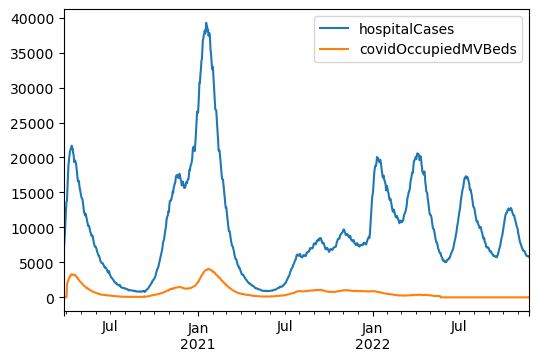

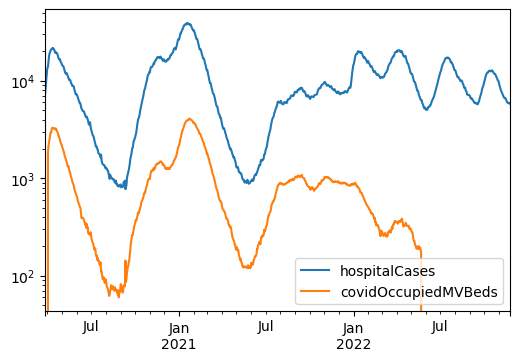

In [87]:
timeseriesdf.plot() 
timeseriesdf.plot(logy=True) #Generate log and linear images

In [88]:
# pandas makes saving to a pickle file dead easy:
timeseriesdf.to_pickle("timeseriesdf.pkl")


In [89]:
#It computed from the json files
timeseriesdf=pd.read_pickle("timeseriesdf.pkl");


In [90]:
#set the option 
series=wdg.SelectMultiple(
    options=['hospitalCases', 'covidOccupiedMVBeds'],
    value=['hospitalCases', 'covidOccupiedMVBeds'],
    rows=2,
    description='Stats:',
    disabled=False

)

In [91]:
scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)

In [92]:
controls=wdg.HBox([series, scale])

In [93]:
def timeseries_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        timeseriesdf[list(gcols)].plot(logy=logscale)
        plt.show()   
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); 
# capture output in widget graph   
graph=wdg.interactive_output(timeseries_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

In [94]:
ctrls=wdg.VBox([series, scale])
# put the graph and the controls side by side
form=wdg.HBox([graph, ctrls])

# Now form interface is ready!
display(form)

## Deploying the dashboard

Once your code is ready and you are satisfied with the appearance of the graphs, replace all the text boxes above with the explanations you would like a dashboard user to see. The next step is deploying the dashboard online - there are several [options](https://voila.readthedocs.io/en/stable/deploy.html) for this, we suggest deploying as a [Binder](https://mybinder.org/). This is basically the same technique that has been used to package this tutorial and to deploy this template dashboard. The instructions may seem a bit involved, but the actual steps are surprisingly easy - we will be going through them together during a live session. You will need an account on [GitHub](https://github.com/) for this - if you don't have one already, now it's the time to create it. 

**Author and Copyright Notice** Remember if you deploy this dashboard as a Binder it will be publicly accessible. Take credit for your work! Also acknowledge the data source: *Based on UK Government [data](https://coronavirus.data.gov.uk/) published by [Public Health England](https://www.gov.uk/government/organisations/public-health-england).*